In [87]:
#API first trial. fingers crossed

%pip install PyPI #PyPI = package

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#PyPI'


# Semantic Scholar

In [81]:
%pip install semanticscholar

Note: you may need to restart the kernel to use updated packages.


In [8]:
#import the library semantischolar to access data through API.

import semanticscholar as sch

In the next block set the variable "source". In source we are going to "call" through the semanticscholar library the source article that we defined. we are going to use the DOI as identificative to call the paper  --we use the function sch.paper().
This will return several data regarding the source paper. As a matter of facts, sch.paper() will return a dictionary with several keys: (['abstract', 'arxivId', 'authors', 'citationVelocity', 'citations', 'doi',
'influentialCitationCount', 'paperId', 'references', 'title', 'topics', 'url', 'venue', 'year']. We can display every single key of the dictionary by calling source.keys(), where "source" is our variable. we can access a specific key with source['specific key']. for instance we can get the title of the given paper by using source['title'], where source is our variable.

In [15]:
source = sch.paper('10.5860/choice.29-1788')#ID-DOI of the paper in semantic scholar #DOI of "Human aggression by Anderson and Bushman"
source.keys()
#dict_keys(['abstract', 'arxivId', 'authors', 'citationVelocity', 'citations', 'doi',
#'influentialCitationCount', 'paperId', 'references', 'title', 'topics', 'url', 'venue', 'year'])
source['title']
source['authors']
source['year']
source['paperId']
source['topics']

source['paperId']

# len(source['citations'])
# count = 0
# test = {}
# for citation in source['citations']:
#     ID = citation['paperId'] #Use ID as Key
#     print(ID, count)
#     count += 1
#     test[ID] = count
# print(len(source['citations']))

     

'afdb6660572516addb602f671e7b8d5cec60d33d'

#### Get the lists of citations of the source (not yet 1st gen papers, some info still missing)


In order to know which articles cites the source article, we need to get the list of the citations of the source article. At the first stage, we will NOT access the papers with all the related information (e.g., title, topics), but only the list of the identificatives (DOI) of every citations, authors, and year. 
To achieve this first step, we need to create a for loop that iterates every citation in the source citation list. it states that: for every citation in the citation list of the source paper, print the citation DOI, the authors, and the year.

In [84]:
#which papers cite 'Human aggression'?

#source = source article

source['citations']
for citation in source['citations']:
    print(citation['doi'])
    print(citation['authors'])
    print(citation['year'])
    



10.12740/APP/33358
[{'authorId': '3884819', 'name': 'Jan Alexander Golembiewski', 'url': 'https://www.semanticscholar.org/author/3884819'}]
2014
10.4172/2375-4494.1000360
[{'authorId': '118090270', 'name': 'O OkaforaSamuel', 'url': 'https://www.semanticscholar.org/author/118090270'}, {'authorId': '114760844', 'name': 'O ObaraOkezi', 'url': 'https://www.semanticscholar.org/author/114760844'}]
2017
10.1037/per0000098
[{'authorId': '4306945', 'name': 'Falk Mancke', 'url': 'https://www.semanticscholar.org/author/4306945'}, {'authorId': '2955508', 'name': 'Sabine C. Herpertz', 'url': 'https://www.semanticscholar.org/author/2955508'}, {'authorId': '3189068', 'name': 'Katja Bertsch', 'url': 'https://www.semanticscholar.org/author/3189068'}]
2015
10.1371/journal.pone.0111790
[{'authorId': '40514615', 'name': 'Jack Hollingdale', 'url': 'https://www.semanticscholar.org/author/40514615'}, {'authorId': '2869552', 'name': 'Tobias Greitemeyer', 'url': 'https://www.semanticscholar.org/author/2869552'

### 1st generation papers (papers that cite the source article)

Now we *really* need to get the papers which cites the source (first generation papers). We want to ghater all possible information about the first generation papers, including the key words (topics) for each paper.
to achieve that we need to set source = sch.paper('unique ID semantic scholar'), due to the fact that calling the source using the DOI might make us lose some papers that do not have the DOI. (visible in the output of the previous code cell).

We will use a for loop which will return a dictionary with all the first generation papers (all info for each paper included).

- create an empty dictionary that will be filled up with our for loop
- set the source variable equal to sch.paper ('ID of semantic scholar')

FOR LOOP:
- iterate every citation in the list of citations of the source
- let's set up ID equal to the citation['paperID']. So for every citation in the list of citations of the source, let's get the ID of each citation.
- now, the first generation will be equal to getting every paper (through the ID) from semantic scholar. which is exactly what we did for the source paper at the beginning. So first_gen_paper = sch.paper(ID).

we also add the statment that if there is not a paper in the citation list, then we ll print "does not exist",
if the paper is there we will print it and store it in the dictionary: first_gen_papers_dic[ID] = first_gen_paper


In [16]:
#CALL THE papers IDs THAT CITE "HUMAN AGGRESSION"

#first_gen_ID_dic = {} #create an empty dictionary
first_gen_papers_dic= {}

source = sch.paper('afdb6660572516addb602f671e7b8d5cec60d33d') #UNIQUE ID SEMANTIC SCHOLAR
for citation in source['citations']:
    ID = citation['paperId'] #Use ID as Key
    first_gen_paper = sch.paper(ID)
    if first_gen_paper is None:
        print('doesnt exist')
    else:
        print(ID)
    #. append(x) for lists
#     first_gen_papers_dic.update({ID:first_gen_paper}) #Store in a dictionary all the 1st gen PAPERS
    first_gen_papers_dic[ID] = first_gen_paper #Store in a dictionary all the 1st gen PAPERS
#     print(first_gen_paper['topics'])

print(len(first_gen_papers_dic.keys()))    

789


Next, with a foor loop we will count the number of citing papers for each paper in the first generation. 


In [20]:
#count the number of citing papers for each paper in the first generation

total_citations = 0
for key in first_gen_papers_dic:
    paper = first_gen_papers_dic[key]
    second_gen_citations = paper['citations']
    num_citations_for_this_paper = len(second_gen_citations)
    total_citations += num_citations_for_this_paper
    
print(total_citations)

9707


In [ ]:
# Get the papers (1st gen) ##INCLUDED IN THE PREVIOUS LOOP

#for ID in first_gen_ID_dic:
    #first_gen_papers = sch.paper(ID)
    #print(first_gen_papers['topics'])
    


In [ ]:
#do a mega loop from citations to Ids, to papers

# 2nd generation

Now that we have the papers from the first generation, we need to get all the papers that cite them. the procedure is similar to the one that we used to get the first generation from the source paper. 

In [22]:
# store the list of citations for each 1st gen paper

#second_gen_ID_dic = {} integrate in the loop
second_gen_papers_dic = {}

for key in first_gen_papers_dic:
    paper = first_gen_papers_dic[key]
    for citation in paper['citations']:
        ID = citation['paperId']
       # second_gen_ID_dic.append(ID) #Store in a list all the 2nd gen IDs
        second_gen_paper = sch.paper(ID)
        if second_gen_paper is None:
            print('doesnt exist')
        else:
            print(ID)
#         second_gen_papers_dic.update({ID:second_gen_paper}) #Store in a dic all the 2nd gen PAPERS
        second_gen_papers_dic[ID] = second_gen_paper

#         print(second_gen_paper['topics'])

print(len(second_gen_papers_dic.keys()))

8baad938823ac30a8ac899d40573136e6e076914
ef9cc19e1f3509d165ca079a43b8736c38d47b7a
0a34f6f22796a5f18f293412a793445ede0de665
a33fc92dd56952adf2594bbcb8eb3f47319b46a8
7dc607b2895426aa8a9d21e162ea2cbba446f96a
890d1d57ec91ee433a5d032793062fc2eeae244d
13c201667cb4aa0724a7a6e286339a5f6113ebbf
cae7c74b867f41855844b92142fc6c8f6556ef1e
a413439156e0c394cf36126a0c4375d0f8755533
a0462cfc0caffc361ec057db0693add976026f08
3d3310023e30fa0b1bee88ecd6a542fda0c9338d
641f48e6b7ab895edf87cc8e9e457aa6552c73f2
4f60fc3743705590ba6969de5b023607373980e4
b48695b74b166f423d756b3fdea8fa20c0035c83
b6446be57014cc9fd6dd6e4f41ff9f4485a6b0ea
679a5e434ca038f34aed9bbd3fe9f201e51637e3
55012ac814aae6e20f53540d71025f85f3efa328
e1fc6e18b5b7be585d5402a494818c7ae37cdbcc
bd1d9f40bee445ef8ca36e847a1fb2e513f58665
5862a9283e3007ea0b6d778f73afa8566245113e
fc98f1dbb4c15cf7998e1df686246f72672e30a5
06500192ac0428eceeea5161f2f30c8717b47534
92d76c2294a4e2b0a6e1328b33bd4c6a3235fab9
bf472880a1e49d80e32740f4145d6804c12251c4
7d0bcceeb040f7d9

In [25]:
#count the number of citing papers for each paper in the second generation (for fun!)

total_citations = 0
for key in second_gen_papers_dic:
    paper = second_gen_papers_dic[key]
    try:
        third_gen_citations = paper['citations']
    except Exception as e:
        print(e)
    num_citations_for_this_paper = len(third_gen_citations)
    total_citations += num_citations_for_this_paper
    
print(total_citations)

'citations'
'citations'
'citations'
'citations'
'citations'
77466


### Storing data in Jason file

In [19]:
#import json, sobstitute lists with dictionnaires, save file
### save source
import json
source
with open('source.json', 'w') as source_json:
    json.dump(source, source_json)

In [26]:
#saving first gen papers

first_gen_papers_dic
with open('first_gen.json', 'w') as first_gen_json:
    json.dump(first_gen_papers_dic, first_gen_json)

In [27]:
#saving second gen papers

second_gen_papers_dic
with open('second_gen.json', 'w') as second_gen_json:
    json.dump(second_gen_papers_dic, second_gen_json)

# Reading (accessing) my data from json

In [5]:
import json
#access the source paper
with open('source.json', 'r') as source:
    data=source.read()
source_obj = json.loads(data)

print(source_obj['title'])
print(source_obj['paperId'])

Human aggression.
afdb6660572516addb602f671e7b8d5cec60d33d


In [6]:

#access the 1st gen paper
with open('first_gen.json', 'r') as first_gen:
    data=first_gen.read()
first_gen_obj = json.loads(data)

#print(first_gen_obj.keys())
#print(type(first_gen_obj))

print(len(first_gen_obj.keys()))

# for key in first_gen_obj: #check if the file open correctly while avoiding to print all the dictionnary which would be too big to open properly
#     print(key)
    
   

789


In [7]:
len(first_gen_obj)

789

In [8]:
#access the 2nd gen paper
with open('second_gen.json', 'r') as second_gen:
    data=second_gen.read()
second_gen_obj = json.loads(data)

print(len(second_gen_obj.keys()))

7073


In [9]:
len(second_gen_obj)

7073

### Storing all the data (source, first_gen, second_gen in )

In [10]:
import numpy as np

# store data as 3 columns, source, 1st gen and 2nd gen
# length must be number of papers in 2nd gen
# specify that it stores Python objects, so we can use the key directly
#(### --> real code to comment OUT)

### data = np.zeros((len(second_gen_obj), 3), dtype=object)

#data[0,0] = 'example1'
#data[1,2]= 'exemple2'

### data[:,0]= source_obj['paperId']


### for i, ID in enumerate(second_gen_obj):#enumerate --> i= 0-1-2-3-4-5...
     ### data[i,2]=ID
 
 # print(i, ID) 


### print(data.dtype)
### print(data)

In [11]:
# save the numpy data as csv
### np.savetxt("connections.csv", data, delimiter=",", fmt="%s")

In [12]:
matrix_first_gen = first_gen_obj.copy()
matrix_second_gen = {}

# if paper in first generation appears in second generation, remove the extra copy (unneeded for matrix)
for key in second_gen_obj.keys():
    if key not in matrix_first_gen.keys():
        matrix_second_gen[key] = second_gen_obj[key]

rows = 1 + len(matrix_first_gen) + len(matrix_second_gen)+1 # number of rows
columns= 1 + len(matrix_first_gen) + len(matrix_second_gen)+1# number of columns
#print(rows, columns)
matrix = np.zeros((rows, columns), dtype=object) #build an empty matrix

#print(matrix[0:4,0:4])
#print(matrix)
print(np.shape(matrix))


(7448, 7448)


In [13]:
#make a matrix all citations by all citations:

offset = 1 #skip first row, since it contains IDs of the papers
matrix[offset,0] = source_obj['paperId'] #put the source id into the first column
matrix[0,offset] = source_obj['paperId'] #put the source id into the first row

for ID in (matrix_first_gen.keys()): 
    offset = offset + 1 # after the source put in the matrix the Ids of the first gen papers
    matrix[offset,0] = ID
    matrix[0,offset] = ID
    
for ID2 in (matrix_second_gen.keys()):
    offset = offset +1 # after the 1st gen, ut the second gen Ids.
    matrix[offset,0] = ID2
    matrix[0,offset] = ID2

print(len(matrix_first_gen.keys()))
print(len(matrix_second_gen.keys()))

#     for j, ID1 in enumerate(first_gen_obj):
#         onset= i+j
#         matrix[onset,0]=ID1
#         for h, ID2 in enumerate(second_gen_obj):
#             onset2=j+h
#             matrix[onset2,0] = ID2
#print(onset2)
print(matrix[:,0])
print(offset)
#for i, ID in enumerate(second_gen_obj):#enumerate --> i= 0-1-2-3-4-5...
     ### data[i,2]=ID


789
6657
[0 'afdb6660572516addb602f671e7b8d5cec60d33d'
 '0d0bd8b433be70723429fa84eee9d8600b515905' ...
 '3e5afab3c51fe057dd299bdb77e753acd65d887f'
 'a4060c32c325d89c1e645784cfa6afb6c35b606c'
 '8064bcb0790de232e30dcf1a2d37218a3c0ce689']
7447


In [22]:
for i, cell in enumerate(matrix[1:,0]):
    # source paper
    if cell == source_obj['paperId']:
        for citation in source_obj['citations']:
            ID = citation['paperId']
            index = np.where(matrix[0,1:] == ID) #where: return the position that an id occurs.  
            matrix[i+1, index] = 1
            
    # first generation
    if cell in matrix_first_gen.keys():
        paper = matrix_first_gen[cell]
        for citation in paper['citations']:
            ID = citation['paperId']
            index = np.where(matrix[0,1:] == ID) #where: return the position that an id occurs. 
            matrix[i+1, index] = 1
#print(matrix)

    # second generation
    
    if cell in matrix_second_gen.keys():
        paper = matrix_second_gen[cell]
        if "citations" in paper.keys():
            for citation in paper['citations']:
                ID = citation['paperId']
#     if cell in matrix_second_gen.keys():
#         paper = matrix_second_gen[cell]
#         for citation in paper['citations']:
#             ID = citation['paperId']
                index = np.where(matrix[0,1:] == ID) #where: return the position that an id occurs. 
                matrix[i+1, index] = 1
print(matrix)
    

     


[[0 'afdb6660572516addb602f671e7b8d5cec60d33d'
  '0d0bd8b433be70723429fa84eee9d8600b515905' ...
  '3e5afab3c51fe057dd299bdb77e753acd65d887f'
  'a4060c32c325d89c1e645784cfa6afb6c35b606c'
  '8064bcb0790de232e30dcf1a2d37218a3c0ce689']
 ['afdb6660572516addb602f671e7b8d5cec60d33d' 1 1 ... 0 0 0]
 ['0d0bd8b433be70723429fa84eee9d8600b515905' 0 0 ... 0 0 0]
 ...
 ['3e5afab3c51fe057dd299bdb77e753acd65d887f' 0 0 ... 0 0 0]
 ['a4060c32c325d89c1e645784cfa6afb6c35b606c' 0 0 ... 0 1 0]
 ['8064bcb0790de232e30dcf1a2d37218a3c0ce689' 0 0 ... 0 0 0]]


In [23]:
# save the numpy data matrix as csv

np.savetxt("citations_matrix.csv", matrix, delimiter=",", fmt="%s")

In [1]:

# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

######citations_matrix =  pd.read_csv('citations_matrix.csv', index_col=0) # reas citation matrix from csv


matrix_np = np.genfromtxt("citations_matrix.csv", delimiter=",", dtype=object) #reconvert the matrixc.csv in a numpy matrix nd prevent the lost of the Ids

# print(matrix_nums)


In [6]:
# matrix_ints = matrix_nums.astype(int)
# print(np.sum(matrix_ints[10,:]))

In [87]:
# Display the Matrix

import matplotlib.pyplot as plt
import matplotlib.cm as cm


fig = plt.figure(figsize=(30, 30), dpi=500) # dpi = very very high resolution!
ax = fig.add_subplot(111)
matrix_full = matrix_np[1:,1:].astype(np.uint8) # astype(np.uint8) --> to be able to save the image later
cax = ax.matshow(matrix_img, interpolation='nearest')

plt.xlabel('All papers')
plt.ylabel('All papers')
plt.title('Citations Matrix')

plt.show()

#########################

from PIL import Image
im = Image.fromarray(matrix_full*255) # (* 255 = white. we highlight the white cells)
im.save('matrix_full.png')

# Degree matrix
#### The degree matrix is a diagonal matrix where the value at entry (i, i) is the degree of node i. 

In [4]:
import numpy as np
matrix_np = np.genfromtxt("citations_matrix.csv", delimiter=",", dtype=object) #reconvert the matrixc.csv in a numpy matrix nd prevent the lost of the Ids
degree_matrix_right_type = matrix_np[1:,1:].astype(np.uint8) # put uint8 because if not it does not work! ##remove first row and first colum from matrix_np, because there are the labels
#####
degree_matrix = np.diag(degree_matrix_right_type.sum(axis=1)) #also "diagonal matrix" 

print(degree_matrix)

[[789   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   9   0]
 [  0   0   0 ...   0   0   0]]


In [33]:
# save the numpy degree_matrix, and matrix_np without the IDs as csv

matrix_np_no_IDs = matrix_np[1:,1:].astype(np.int)

print(matrix_np_no_IDs)

degree_matrix = degree_matrix.astype(np.int)

print(degree_matrix)

np.savetxt("matrix_np_no_IDs.csv", matrix_np_no_IDs, delimiter=",", fmt="%d") # %d = integer

np.savetxt("degree_matrix.csv", degree_matrix, delimiter=",", fmt="%d")

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
[[789   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   9   0]
 [  0   0   0 ...   0   0   0]]


In [31]:
# read the matrix in the right format (numpy)

import numpy as np
##... = matrix_np[1:,1:].astype(np.uint8) # put uint8 because if not it does not work!

matrix_np_no_IDs = np.genfromtxt("matrix_np_no_IDs.csv", delimiter=",", dtype=int) #reconvert the matrixc.csv in a numpy matrix nd prevent the lost of the Ids
degree_matrix = np.genfromtxt("degree_matrix.csv", delimiter=",", dtype=int) #reconvert the matrixc.csv in a numpy matrix nd prevent the lost of the Ids


In [ ]:
#print(degree_matrix)

#### Exclude papers with less than 3 citations



In [2]:
# # drop the papers with less than 3 citations
import numpy as np

citation_col = np.sum(matrix_np_no_IDs,axis=1)>=3
citation_row = np.sum(matrix_np_no_IDs,axis=0)>=3

matrix_filtered = matrix_np_no_IDs[citation_col,:]
matrix_filtered = matrix_filtered[:,citation_col]
print(np.sum(matrix_filtered,axis=1))

np.savetxt("matrix_filtered.csv", matrix_filtered, delimiter=",", fmt="%d")
# print(np.sum(matrix_filtered,axis=1))
np.shape(matrix_filtered)

NameError: name 'matrix_np_no_IDs' is not defined

In [41]:
import numpy as np

matrix_np = np.genfromtxt("citations_matrix.csv", delimiter=",", dtype=object) #reconvert the matrixc.csv in a numpy matrix nd prevent the lost of the Ids

citation_col = np.sum(matrix_np_no_IDs,axis=1)>=3
citation_row = np.sum(matrix_np_no_IDs,axis=0)>=3

citation_col_list = citation_col.tolist()
citation_col_list.insert(0, True)
citation_col = np.array(citation_col_list)

matrix_filtered_w_ids = matrix_np[citation_col,:]
matrix_filtered_w_ids = matrix_filtered_w_ids[:,citation_col]

np.savetxt("matrix_filtered_w_ids.csv", matrix_filtered, delimiter=",", fmt="%d")

In [58]:
import json

with open('source.json', 'r') as source:
    data=source.read()
source_obj = json.loads(data)
with open('first_gen.json', 'r') as first_gen:
    data=first_gen.read()
first_gen_obj = json.loads(data)
with open('second_gen.json', 'r') as second_gen:
    data=second_gen.read()
second_gen_obj = json.loads(data)

with open('node_ID_title.txt', 'w', encoding='utf-8') as file:
    for i, Id in enumerate(matrix_filtered_w_ids[0,1:]):
        ID = Id.decode('utf-8')
        if ID == 'afdb6660572516addb602f671e7b8d5cec60d33d':
            write_str = str(i)+'; '+ID+'; '+source_obj['title']+'\n'
            print(write_str)
            file.write(write_str)
        elif ID in first_gen_obj.keys():
            write_str = str(i)+'; '+ID+'; '+first_gen_obj[ID]['title']+'\n'
            print(write_str)
            file.write(write_str)
        elif ID in second_gen_obj.keys():
            write_str = str(i)+'; '+ID+'; '+second_gen_obj[ID]['title']+'\n'
            print(write_str)
            file.write(write_str)


0; afdb6660572516addb602f671e7b8d5cec60d33d; Human aggression.

1; b5515225a353008bc391d7f351429d9cb0a5d35e; Boring Thoughts and Bored Minds: The MAC Model of Boredom and Cognitive Engagement

2; 972dbeec975187677c8ffb66b27ee31f6ba95749; Intimate Relationships and Personal Distress: The Invisible Harm of Psychological Aggression.

3; 6c35336ec529c405ce6188d532795e0aa87419f2; Dimorphous expressions of positive emotion: displays of both care and aggression in response to cute stimuli.

4; 00ed4b618158b6fa0e135da0abd9eb97038a6f5b; Physical aggressiveness and gray matter deficits in ventromedial prefrontal cortex

5; e0470328c73107faca9790c041b9b1b4eb40a2d2; Online Gaming, Internet Addiction, and Aggression in Chinese Male Students: The Mediating Role of Low Self-Control

6; 5e75df72f5176c6300af181a569193e14c98f9f0; The dimensions and mechanisms of mindfulness in regulating aggressive behaviors.

7; 631500c494fbad0dbcc64bd04921b67405bb05d5; " Only God Can Judge Me " : Tupac Shakur, the Leg

In [115]:

###################
# matrix_np = np.genfromtxt("citations_matrix.csv", delimiter=",", dtype=object) #reconvert the matrixc.csv in a numpy matrix nd prevent the lost of the Ids
# degree_matrix_right_type = matrix_np[1:,1:].astype(np.uint8) # put uint8 because if not it does not work! ##remove first row and first colum from matrix_np, because there are the labels
###############

# degree matrix with matrix filtered (dropped papers with 0 citations)

degree_matrix_filtered = np.diag(matrix_filtered.sum(axis=1)) #also "diagonal matrix" 

print(degree_matrix_filtered)

[[382   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 ...
 [  0   0   0 ...   3   0   0]
 [  0   0   0 ...   0   6   0]
 [  0   0   0 ...   0   0   1]]


In [116]:
#save the filtered degree matrix

degree_matrix_filtered = degree_matrix_filtered.astype(np.int)

np.savetxt("degree_matrix_filtered.csv", degree_matrix_filtered, delimiter=",", fmt="%d")

In [1]:
# read the matrix in the right format (numpy)

import numpy as np
##... = matrix_np[1:,1:].astype(np.uint8) # put uint8 because if not it does not work!

matrix_filtered = np.genfromtxt("matrix_filtered.csv", delimiter=",", dtype=int) #reconvert the matrixc.csv in a numpy matrix nd prevent the lost of the Ids

degree_matrix_filtered = np.genfromtxt("degree_matrix_filtered.csv", delimiter=",", dtype=int) #reconvert the matrixc.csv in a numpy matrix nd prevent the lost of the Ids
print(degree_matrix_filtered)

np.shape(matrix_filtered)

[[382   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 ...
 [  0   0   0 ...   3   0   0]
 [  0   0   0 ...   0   6   0]
 [  0   0   0 ...   0   0   1]]


(1345, 1345)

In [3]:
print(matrix_filtered)

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [4]:
#matrix filtered without source!!!1
matrix_filtered_nosource = matrix_filtered[1:,1:]
print(matrix_filtered_nosource)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [6]:
np.savetxt('matrix_filtered_nosource.csv', matrix_filtered_nosource, delimiter =',', fmt = "%d") #"%d" it makes it all integers

In [4]:
citations = degree_matrix_filtered.diagonal()
np.savetxt("degree_matrix_citations.csv", citations.T, delimiter=",", fmt="%d")

In [3]:
print(matrix_filtered)

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


The actual matrix contains 1345 articles.


In [133]:
print(vecs_filtered)
vecs_filtered_abs = abs(vecs_filtered)

[[ 1.82676691e-03+0.j  1.44857219e-03+0.j  1.90273115e-04+0.j ...
   3.37854617e-03+0.j -2.52731783e-04+0.j  9.99996519e-01+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 ...
 [ 5.50863046e-04+0.j  1.47781764e-04+0.j -1.23683529e-05+0.j ...
  -2.73919584e-12+0.j  7.11834632e-14+0.j -1.50695063e-13+0.j]
 [ 1.09262625e-04+0.j -1.22820650e-05+0.j -1.06204484e-05+0.j ...
  -6.62159040e-09+0.j  1.09890648e-10+0.j -3.24918045e-13+0.j]
 [ 0.00000000e+00+0.j  7.54739218e-01+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]]


In [ ]:
# # convert the data in Cytoscape format ( GraphML format)
# #networkx.write_graphml(G, path) 

# nx.write_graphml(network, "network_cyto") #network is indeed our network # save "network_cyto" for cytoscape

In [10]:
# #the same but for matrix/graph without source

# nx.write_graphml(network_nosource, "network_nosource_cyto")

#### network metric scores calculated with cytoscape software


In [25]:
import pandas as pd
table_hist = pd.read_csv(r"C:\Users\aless\Desktop\projects\network analysis\hubba\Table_for_hist.csv")
table_hist.head(5)

,Node,Betweenness,rank_bet,Node.1,BottleNeck,rank_bot,Node.2,Closeness,rank_cl,Node.3,...,rank_dmnc,Node.5,EcCentricity,rank_ecc,Node.6,EPC,rank_epc,Node.7,MNC,rank_mnc
0,0,1.227137e+06,1,0,1342,1,0,860.33333,1,0,...,1,0,0.33259,1,0,142.274,1,0,259,1
1,321,8.014597e+04,2,54,61,2,54,606.50000,2,560,...,2,1,0.24944,2,560,127.707,2,560,77,2
2,345,7.745487e+04,3,122,43,3,141,591.83333,3,54,...,3,2,0.24944,3,141,114.781,3,54,71,3
3,54,7.547494e+04,4,321,40,4,216,590.58333,4,216,...,4,3,0.24944,4,216,114.334,4,216,59,4
4,122,6.169302e+04,5,345,29,5,137,586.33333,5,141,...,5,4,0.24944,5,54,113.120,5,141,55,5


In [27]:
# for i, col_name in enumerate(table_hist):    
#     if col_name[0] == "r" :
#         table_hist.drop(col_name)



### Simulate network with 5 communities and 100 nodes (papers), then visualize it and compare the results with the software Cytoscape (practical example).

In [ ]:
import math
import copy
import random
import numpy as np

n = 100 #number of papers
communities = 5 #number of communities
proportion_in_citation = 0.80 #proportion of papers in each community that cites others in their own community
simulate_matrix2 = np.zeros([n,n]) # create a matrix columns x rows filled of zeros (nxn)

print(simulate_matrix2)

m=0 #set the counter at zero

separator = math.ceil(n/ communities)
communities_separator = []
while m < n:
    m = m + separator
    if m > n:
        m = n
    communities_separator.append(m)
    
print(communities_separator)

dic_com = {} #store all the papers in a dictionary based on their community (key)

start = 0 # increment paper after paper
separator_index = 0 #when a communities ends. separator_index = 0 --> first value of communities_separator
while start < n: #while the counter is < than the total number of papers in the matrix...
    dic_com[separator_index]=[]
    for paperID in range(start, communities_separator[separator_index]): # for each paper in the range between the start and the end of each community...
         dic_com[separator_index].append(paperID)
    start = communities_separator[separator_index]
    separator_index = separator_index +1
    
print(dic_com)

for com_key in dic_com:
    com = dic_com[com_key] #com = the 'key' community in the dictionary (communities: key)
    max_num_in_citations = len(com)-1
    max_num_citations_across_all = n-1
    in_papers = random.sample(com, int(proportion_in_citation*len(com)))
    for paper in com:
        if paper in in_papers:
            num_citations = random.randint(1,max_num_in_citations)
            com_copy = copy.copy(com)
            com_copy.remove(paper)
            citations = random.sample(com_copy, num_citations)
            for citation in citations:
                simulate_matrix2[citation, paper] = 1
        else:
            num_citations = random.randint(1,max_num_citations_across_all)
            citations = random.sample(range(0,n), num_citations)
            for citation in citations:
                simulate_matrix2[citation, paper] = 1
print(simulate_matrix2)

np.shape(simulate_matrix2)

np.savetxt('simulation_matrix2.csv', simulate_matrix2,  delimiter=",", fmt="%d")



In [ ]:
import networkx as nx # for network graphs
import nxviz as nv # for plotting graphs
import matplotlib.pyplot as plt
import numpy as np

simulation_matrix2 = np.genfromtxt("simulation_matrix2.csv", delimiter=",", dtype=int) #reconvert the matrixc.csv in a numpy matrix nd prevent the lost of the Ids

np.shape(simulation_matrix2)

simulation_matrix2 = nx.from_numpy_matrix(simulation_matrix2, create_using=nx.DiGraph) #DiGraph specified directed graph
simulation_matrix_net2 = nv.MatrixPlot(simulation_matrix2) 
#try different types of plot
simulation_matrix_net2.draw()
plt.show()

In [ ]:
# FIND COMMUNITIES
# from community import community_louvain
import community

import networkx as nx 
import matplotlib.pyplot as plt

##  transform the graph to undirected

und_simulation_matrix2 = simulation_matrix2.to_undirected()

#first compute the best partition
partition = community.best_partition(und_simulation_matrix2)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(und_simulation_matrix2)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(simulation_matrix_net2, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(und_simulation_matrix2,pos, alpha=0.5)
plt.show()


## analysis of simulation with Cytoscape

- retrieve/confirm number of communities
- visualize them
- know which node belong to wich community
- other things

The advantage of running the analysis on a simulation first is that you know the answers to the questions you are asking.
In this case we expect 5 communities. each community will contain nodes that are for the 80% of the time progressive. example: first community will have nodes from 0 to about 20 (in a progressive way for the 80%. e.g. 0-1-2-3-4-6-7-8-9-10-78). This because nodes in a specific community are connected for the 80% with nodes WITHIN the community and for 20% of the time with nodes outside the community.

In [ ]:
# convert the data in Cytoscape format ( GraphML format)
#networkx.write_graphml(G, path) 

nx.write_graphml(simulation_matrix2, "simulation_matrix_5com.graphml") #network is indeed our network # save "network_cyto" for cytoscape

### Simulation 5 communities. Cytoscape network analysis
#### Simple parameters

Clustering coefficient: 0.527  
Connected components: 5  
Network diameter: 5  
Network radius: 2  
Shortest paths: 1889 (19%)  
Characteristic path lenght: 1.630  
Avg. number of neighbors: 14.8  
Number of nodes: 100  
Number of self-loops: 8  
Isolated nodes: 0  
Multi-edge node pairs: 194

All the plots are on the software but they are not reported here. 

### Clustering

In order to run a cluster analysis, clusterMaker2 (Multi-algorithm clustering app for Cytoscape) has been installed in Cytoscape.
This enabled the function "Cluster maker" in the menu App.
We choose "Community claster (GLay). If you want to separate the clusters, select "create new clustered network"


We were able to identify the 5 communities of the simulation, to separate them, and to clearly see which node belongs to which community.
The image is reported below.




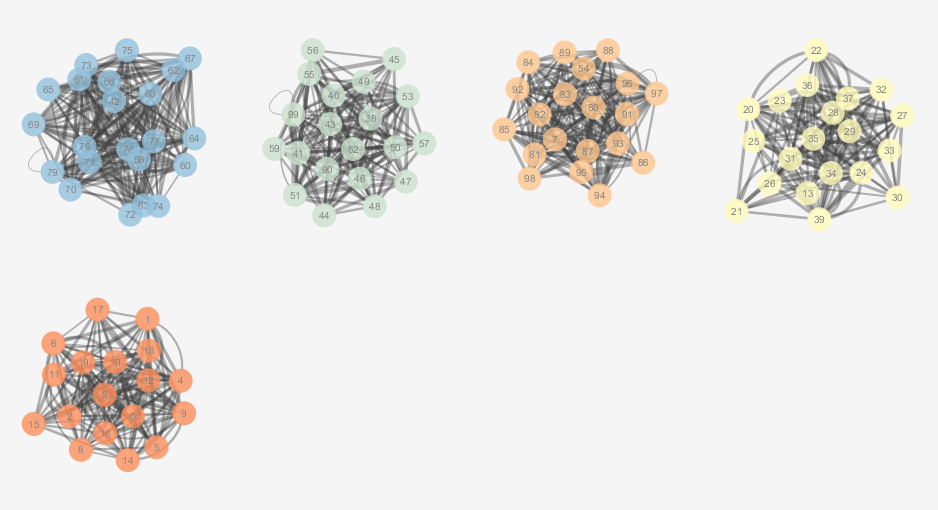

### ... and all the communities together in the same graph...
(deselect all the options).
To make the figure more visible --> layout--> bundle edges


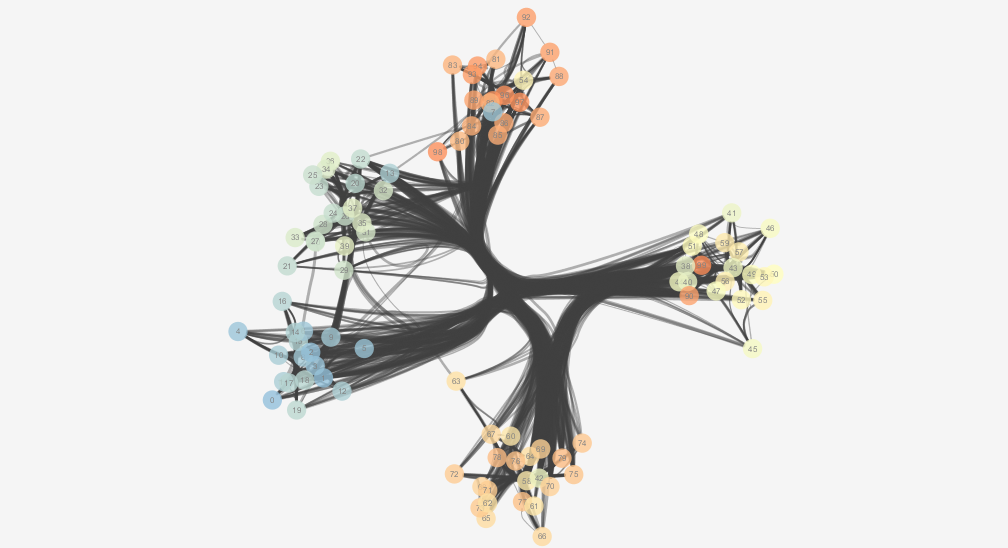